## Multiple Linear Regression and Visualization in Python

数据解释：

mpg	Miles/(US) gallon

cyl	Number of cylinders

disp	Displacement (cu.in.)

hp	Gross horsepower

drat	Rear axle ratio

wt	Weight (1000 lbs)

qsec	1/4 mile time

vs	Engine (0 = V-shaped, 1 = straight)

am	Transmission (0 = automatic, 1 = manual)

gear	Number of forward gears

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
mtcars = sm.datasets.get_rdataset('mtcars')
mtcars_data = mtcars.data

In [4]:
#mtcars_data = pd.read_csv("Data_mtcars.csv")

In [4]:
mtcars_data.head() 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


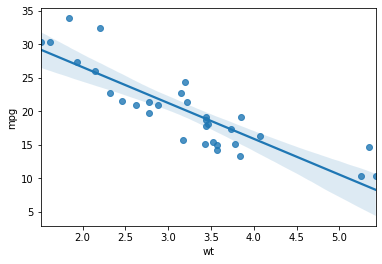

In [5]:
import matplotlib.pyplot as plt

sns.regplot(x="wt", y="mpg", data=mtcars_data);

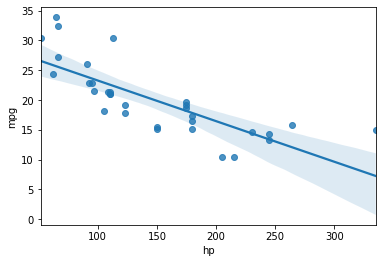

In [6]:
sns.regplot(x="hp", y="mpg", data=mtcars_data);

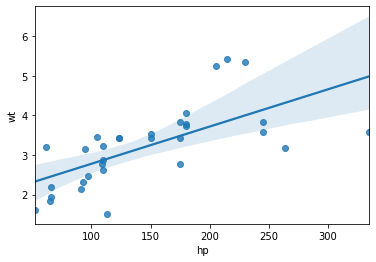

In [7]:
sns.regplot(x="hp", y="wt", data=mtcars_data);

In [8]:
import statsmodels.formula.api as smf

model = smf.ols('mpg ~ hp', data=mtcars_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           1.79e-07
Time:                        09:40:53   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0989      1.634     18.421      0.0

In [9]:
model = smf.ols('mpg ~ wt + cyl', data=mtcars_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     70.91
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           6.81e-12
Time:                        09:40:53   Log-Likelihood:                -74.005
No. Observations:                  32   AIC:                             154.0
Df Residuals:                      29   BIC:                             158.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6863      1.715     23.141      0.0

In [10]:
summary = result.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.6863,1.715,23.141,0.000,36.179,43.194
wt,-3.1910,0.757,-4.216,0.000,-4.739,-1.643
cyl,-1.5078,0.415,-3.636,0.001,-2.356,-0.660


### interaction between independent variables

In [18]:
model = smf.ols('mpg ~ wt + am + wt*am', data=mtcars_data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     46.57
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           5.21e-11
Time:                        09:35:41   Log-Likelihood:                -73.738
No. Observations:                  32   AIC:                             155.5
Df Residuals:                      28   BIC:                             161.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.4161      3.020     10.402      0.0

am has an effect with an interaction:

Y = b0 + b1 * wt + b2 * am + b3 * wt * am 

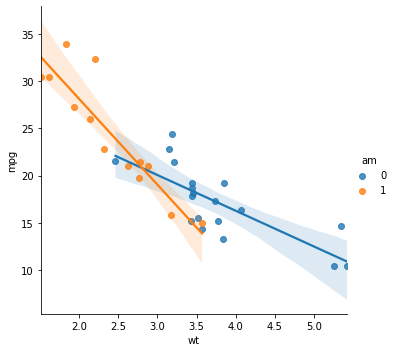

In [19]:
sns.lmplot(x="wt", y="mpg", hue="am", data=mtcars_data)

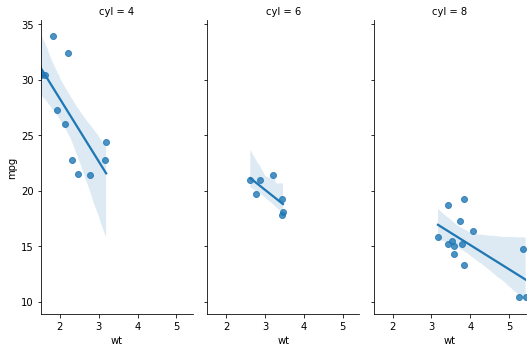

In [20]:
sns.lmplot(x="wt", y="mpg", col="cyl", data=mtcars_data, aspect=.5);

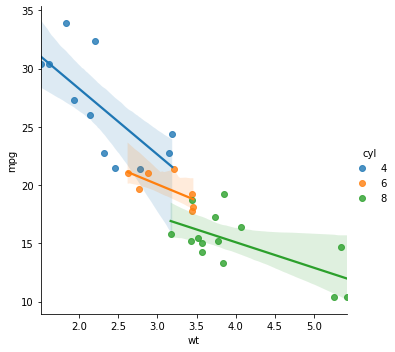

In [21]:
sns.lmplot(x="wt", y="mpg", hue="cyl", data=mtcars_data)